Import libraries

In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

image bluring and canny appling

In [2]:
def canny (image):  
  hls=cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
  h_channel=hls[:,:,0]
  l_channel=hls[:,:,1]
  s_channel=hls[:,:,2]
  blur_image=cv2.GaussianBlur(s_channel,(5,5),0)
  edged_image=cv2.Canny(blur_image,50,150)
  return edged_image

Choosing region of interest

In [3]:
def region_of_interest(image):
  trapezoidal= np.array([
                     [(150,720),
                      (1200,720),
                      ( 750, 440),
                      ( 580, 440)]
                     ])
  mask =np.zeros_like(image)
  cv2.fillPoly(mask,trapezoidal,255)
  masked_image=cv2.bitwise_and(image,mask)
  return masked_image


Perspective& wrap transform 

In [4]:
def PerspectiveTransform (frame):
    pts1 = np.float32([   
                         [280,680],
                          [600,450],
                          [670,450],
                          [1100,680]
                     ])
    pts2 = np.float32([  [430,680],
                          [430,150],
                          [840,150],
                          [980,680]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(frame, matrix,(1280, 720))
    return result

Lane coloring

In [5]:
def lane_detection (image,lines):
 if lines is not None :
        for line in lines:
            x1 ,y1 ,x2 ,y2 =line[0]
            Lane=cv2.line (image,(x1,y1),(x2,y2),(0,255,0),4)
            
 return Lane     

Main function

In [6]:
rgb=cv2.imread('straight_lines2.jpg') 
image=cv2.cvtColor(rgb,cv2.COLOR_BGR2RGB)
array_image=np.copy(image)

show image after applying canny 

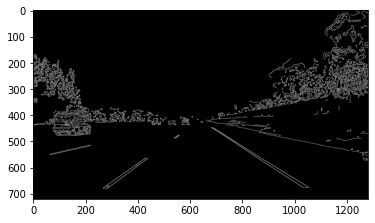

In [7]:
canny_image=canny(array_image)
plt.imshow(canny_image,cmap="gray")

show region_of_interest image 

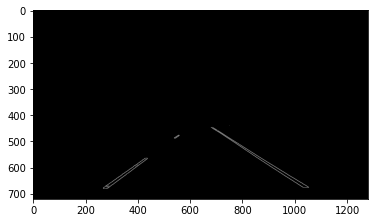

In [8]:
cropped_image= region_of_interest(canny_image)
plt.imshow(cropped_image,cmap="gray")

show image after PerspectiveTransform  

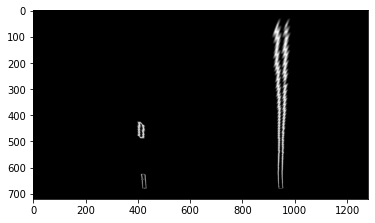

In [9]:
planned_image=PerspectiveTransform(canny_image)
plt.imshow(planned_image,cmap="gray")

showing final image

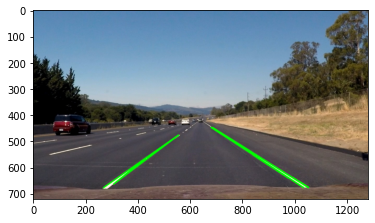

In [10]:
lines=cv2.HoughLinesP(cropped_image,3,np.pi/180,60,np.array([]),maxLineGap=250)
lane_image=lane_detection(array_image,lines)
plt.imshow(lane_image,cmap="gray")

Lane_Detection for Video but i could not test it because of an error that the windows freeze after running

In [11]:
video =cv2.VideoCapture("challenge_video.mp4")
while True :
 ret, frame=video.read()
 if not ret:
    video =cv2.VideoCapture("challenge_video.mp4")
    continue
    ret,frame=video.read()
    image=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    canny_image=canny(image)
    cropped_image= region_of_interest(canny_image)
    lines=cv2.HoughLinesP(cropped_image,3,np.pi/180,60,np.array([]),maxLineGap=250)
    lane_image=lane_detection(frame,lines)
    cv2.imshow( lane_image)
    
    key=cv2.waitkey(1)
    if key==1:
      break
video.release()
cv2.destroyAllWindows

KeyboardInterrupt: 